# Running SOM on Txt: Topic Detection, Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np

tweets_df = pd.read_json('Twitter_SCRAPING/profile_tweets.json', lines=True)
tweets_df.info()
# most columns contain the same number of non-null objects; 
# that umber equals the total number of entries - the number of deleted ones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 36 columns):
contributors                 0 non-null float64
coordinates                  29 non-null object
created_at                   12389 non-null datetime64[ns]
delete                       156 non-null object
display_text_range           3875 non-null object
entities                     12389 non-null object
extended_entities            2316 non-null object
extended_tweet               1322 non-null object
favorite_count               12389 non-null float64
favorited                    12389 non-null float64
filter_level                 12389 non-null object
geo                          29 non-null object
id                           12389 non-null float64
id_str                       12389 non-null float64
in_reply_to_screen_name      2633 non-null object
in_reply_to_status_id        2209 non-null float64
in_reply_to_status_id_str    2209 non-null float64
in_reply_to_user_id        

In [6]:
tweets_df.head()

,contributors,coordinates,created_at,delete,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,None,2017-03-31 08:51:20,NaN,NaN,"{'hashtags': [{'text': 'CAD', 'indices': [66, ...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Thu Mar 30 20:17:52 +0000 2017...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @Lynn_Allen: Check out this cool short vide...,2017-03-31 08:51:20.365,0.0,"{'id': 425197705, 'id_str': '425197705', 'name..."
1,NaN,None,2017-03-31 09:00:12,NaN,NaN,"{'hashtags': [{'text': 'BIM', 'indices': [25, ...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Nuevo proyecto normativo #BIM ha comenzado en ...,2017-03-31 09:00:12.997,0.0,"{'id': 3240514762, 'id_str': '3240514762', 'na..."
2,NaN,None,2017-03-31 09:02:02,NaN,NaN,"{'hashtags': [{'text': 'BIMScotland', 'indices...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Thu Mar 30 18:19:10 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @BIMregScot: #BIMScotland network launch of...,2017-03-31 09:02:02.468,0.0,"{'id': 167155062, 'id_str': '167155062', 'name..."
3,NaN,None,2017-03-31 09:02:53,NaN,NaN,"{'hashtags': [{'text': 'math', 'indices': [82,...","{'media': [{'id': 845702101699317762, 'id_str'...",NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Sat Mar 25 18:21:16 +0000 2017...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @algoritmic: What are some surprising appea...,2017-03-31 09:02:53.240,0.0,"{'id': 15829471, 'id_str': '15829471', 'name':..."
4,NaN,None,2017-03-31 09:03:13,NaN,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Thu Mar 30 17:18:37 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @diegobortolato: How Do You Cool a Data Cen...,2017-03-31 09:03:13.379,0.0,"{'id': 442238362, 'id_str': '442238362', 'name..."


In [49]:
# compare some columns to deside which ones to keep
tweets_df['geogeo'] = np.where(tweets_df['place'] == tweets_df['geo'], True, np.nan)

In [56]:
# remove comparison columns:
tweets_df.drop(['geo'], axis=1, inplace=True)

In [41]:
# drop unnecessary columns
# contributors is empty; delete is not NaN only when the tweet actually does not exist; will remove these rows later; truncated infomation is of no interest
# retweet_count and retweeted; favorite_count and favorited; geo and coordinates, created_at and timestamp_ms contain the same information, not NaN when tweet text is not NaN
# entities contains data that is registered in other columns too (id, name etc.)
# str version of the same information contained in other columns (id_str, in_reply_to_status_id_str, in_reply_to_user_id_str, quoted_status_id_str)
tweets_df.drop(['contributors', 'coordinates', 'created_at', 'delete', 'display_text_range', 'entities', 'extended_tweet', 'retweet_count', 'retweeted', 'favorite_count', 'favorited', 'truncated', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str'],axis=1,inplace=True)               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 20 columns):
extended_entities          2316 non-null object
filter_level               12389 non-null object
geo                        29 non-null object
id                         12389 non-null float64
in_reply_to_screen_name    2633 non-null object
in_reply_to_status_id      2209 non-null float64
in_reply_to_user_id        2633 non-null float64
is_quote_status            12389 non-null float64
lang                       12389 non-null object
place                      209 non-null object
possibly_sensitive         6827 non-null float64
quote_count                2163 non-null float64
quoted_status              612 non-null object
quoted_status_id           612 non-null float64
reply_count                2163 non-null float64
retweeted_status           7330 non-null object
source                     12389 non-null object
text                       12389 non-null object
timestamp_ms      

In [57]:
tweets_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 19 columns):
extended_entities          2316 non-null object
filter_level               12389 non-null object
id                         12389 non-null float64
in_reply_to_screen_name    2633 non-null object
in_reply_to_status_id      2209 non-null float64
in_reply_to_user_id        2633 non-null float64
is_quote_status            12389 non-null float64
lang                       12389 non-null object
place                      209 non-null object
possibly_sensitive         6827 non-null float64
quote_count                2163 non-null float64
quoted_status              612 non-null object
quoted_status_id           612 non-null float64
reply_count                2163 non-null float64
retweeted_status           7330 non-null object
source                     12389 non-null object
text                       12389 non-null object
timestamp_ms               12389 non-null datetime64[ns]
user   

In [87]:
# drop empty tweet rows
print(len(tweets_df[tweets_df.text.isnull()]))
tweets_df[tweets_df.text.isnull()].head()

156


,extended_entities,filter_level,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,reply_count,retweeted_status,source,text,timestamp_ms,user
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [96]:
tweets_df.dropna(how='all', inplace=True)
tweets_df.reset_index(drop=True,inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 19 columns):
extended_entities          2316 non-null object
filter_level               12389 non-null object
id                         12389 non-null float64
in_reply_to_screen_name    2633 non-null object
in_reply_to_status_id      2209 non-null float64
in_reply_to_user_id        2633 non-null float64
is_quote_status            12389 non-null float64
lang                       12389 non-null object
place                      209 non-null object
possibly_sensitive         6827 non-null float64
quote_count                2163 non-null float64
quoted_status              612 non-null object
quoted_status_id           612 non-null float64
reply_count                2163 non-null float64
retweeted_status           7330 non-null object
source                     12389 non-null object
text                       12389 non-null object
timestamp_ms               12389 non-null datetime64[ns]
user   

In [140]:
# text cleaning function:
'''
1. Souping / resolve problems with HTML encoding
2. BOM (Byte Order Mark) removing / in py2 solved by decoding to utf-8-sig; in py3 simply replace the characters 
3. negation handling (replace key with values from negation_dic)
4. lower-case
5. removing special characters
6. tokenizing and joining
'''
import re, string
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
#combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], bom_removed).lower()
    words = [x for x  in preprocess(neg_handled) if len(x) > 1 and not x.startswith(':')]
    return (" ".join(words)).strip()

In [141]:
tweets_df['text'][193]

'RT @PlacesJournal: How does an architecture scholar critique Trump? @nytimes picks up Reinhold Martin @ColumbiaGSAPP @BuellCenter\n\nhttps://…'

In [142]:
# clean the tweets, create a list of clean tweets
%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(tweets_df)):
    if( (i+1)%1000 == 0 ):
        print("Tweets", i+1, "of ", len(tweets_df), "has been processed")                                                                   
    clean_tweet_texts.append(tweet_cleaner(tweets_df['text'][i]))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs
Cleaning the tweets...

Tweets 1000 of  12389 has been processed


/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/vVZAaH3noy" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 2000 of  12389 has been processed
Tweets 3000 of  12389 has been processed


/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/lcdxSLt2pr" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/V4IfkLkXtY" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 4000 of  12389 has been processed
Tweets 5000 of  12389 has been processed


/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/atL3oEBnnj" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 6000 of  12389 has been processed
Tweets 7000 of  12389 has been processed


/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/wEDwmIGHD3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 8000 of  12389 has been processed
Tweets 9000 of  12389 has been processed
Tweets 10000 of  12389 has been processed
Tweets 11000 of  12389 has been processed


/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/dGckzoWwij" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/k8Y0z0St9L" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/hWF9KABsNG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

Tweets 12000 of  12389 has been processed


/Users/zoza/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/nnN83wIrf7" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [144]:
print(len(clean_tweet_texts), clean_tweet_texts[180:184])

12389 ['@autodeskhelp want to create script file that deletes exactly the chars in that attribute field what is the command', '@stantec uses #bim360team to speed up project delivery for the first time their client is part of the process https://t.co/n71ww687zi', 'rt @theb1m and bim explained in free 15 minute video playlist https://t.co/9uez72piif #bim #globalbimcrew https://t.co/j6hd4e', 'coordinaci ón de proyectos internacionales con herramientas #bim @allplan_esp ignacio pérez https://t.co/nt3jqdcc4c']


In [145]:
# further text cleeaning: no mentions, no urls and no hashtags
pat1 = r'@[A-Za-z0-9_]+' # mention
pat2 = r'https?://[^ ]+' # url
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_further(text):
    stripped = re.sub(combined_pat, '', text)
    stripped = re.sub(www_pat, '', stripped)
    letters_only = re.sub("[^a-zA-Z]", " ", stripped)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1 and not x.startswith('#')]
    return (" ".join(words)).strip()

In [147]:
# clean the tweets, create a list of clean tweets
%time
print("Cleaning the tweets...\n")
cleaner_tweet_texts = []
for i in range(0,len(clean_tweet_texts)):
    if( (i+1)%1000 == 0 ):
        print("Tweets", i+1, "of ", len(clean_tweet_texts), "has been processed")                                                                   
    cleaner_tweet_texts.append(tweet_cleaner_further(clean_tweet_texts[i]))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Cleaning the tweets...

Tweets 1000 of  12389 has been processed
Tweets 2000 of  12389 has been processed
Tweets 3000 of  12389 has been processed
Tweets 4000 of  12389 has been processed
Tweets 5000 of  12389 has been processed
Tweets 6000 of  12389 has been processed
Tweets 7000 of  12389 has been processed
Tweets 8000 of  12389 has been processed
Tweets 9000 of  12389 has been processed
Tweets 10000 of  12389 has been processed
Tweets 11000 of  12389 has been processed
Tweets 12000 of  12389 has been processed


In [149]:
print(len(cleaner_tweet_texts), cleaner_tweet_texts[180:184])

12389 ['want to create script file that deletes exactly the chars in that attribute field what is the command', 'uses bim team to speed up project delivery for the first time their client is part of the process', 'rt and bim explained in free minute video playlist bim globalbimcrew', 'coordinaci de proyectos internacionales con herramientas bim ignacio rez']


In [175]:
# create a new df from cleaned tweets and original columns
clean_df = pd.DataFrame(np.column_stack([clean_tweet_texts, cleaner_tweet_texts]), 
                               columns=['text1', 'text2'])

clean_df['timestamp'] = tweets_df.timestamp_ms
clean_df['location'] = tweets_df.place
clean_df['lang'] = tweets_df.lang
clean_df['extra'] = tweets_df.extended_entities
#clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
print('clean_df', len(clean_df))
clean_df.head()

clean_df 12389


,text1,text2,timestamp,location,lang,extra
0,rt @lynn_allen check out this cool short video...,rt check out this cool short video on the hist...,2017-03-31 08:51:20.365,None,en,NaN
1,nuevo proyecto normativo #bim ha comenzado en ...,nuevo proyecto normativo bim ha comenzado en e...,2017-03-31 09:00:12.997,None,es,NaN
2,rt @bimregscot #bimscotland network launch of ...,rt bimscotland network launch of the bim tech ...,2017-03-31 09:02:02.468,None,en,NaN
3,rt @algoritmic what are some surprising appear...,rt what are some surprising appearances of math,2017-03-31 09:02:53.240,None,en,"{'media': [{'id': 845702101699317762, 'id_str'..."
4,rt @diegobortolato how do you cool data center...,rt how do you cool data center the via,2017-03-31 09:03:13.379,None,en,NaN


In [176]:
# are there any empty text entries after cleaning?
null = (len(clean_df[clean_df.text2.isnull()]))
if null > 0:
    clean_df[clean_df.text2.isnull()].head()
else: 
    print(null, 'empty text entries')

0 empty text entries


In [177]:
# only english tweets
english_df = clean_df[clean_df.lang == 'en']
print('english_df', len(english_df))
english_df.head()

english_df 11266


,text1,text2,timestamp,location,lang,extra
0,rt @lynn_allen check out this cool short video...,rt check out this cool short video on the hist...,2017-03-31 08:51:20.365,None,en,NaN
2,rt @bimregscot #bimscotland network launch of ...,rt bimscotland network launch of the bim tech ...,2017-03-31 09:02:02.468,None,en,NaN
3,rt @algoritmic what are some surprising appear...,rt what are some surprising appearances of math,2017-03-31 09:02:53.240,None,en,"{'media': [{'id': 845702101699317762, 'id_str'..."
4,rt @diegobortolato how do you cool data center...,rt how do you cool data center the via,2017-03-31 09:03:13.379,None,en,NaN
5,@kevinjfielding heard that rumor too but it's ...,heard that rumor too but it there in the downl...,2017-03-31 09:51:06.358,None,en,NaN


## Zipf's Law

In [193]:
# Calculate terms frequencies

# count vectorizer to calculate the term frequencies; do not remove stopwords
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(english_df.text2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [216]:
eng_doc_matrix = cvec.transform(english_df.text2)
eng_tf = np.sum(eng_doc_matrix,axis=0)
terms = np.squeeze(np.asarray(eng_tf))
term_freq_df = pd.DataFrame([terms],columns=cvec.get_feature_names()).transpose() #term_freq_df is with stopwords
term_freq_df.columns = ['terms']
#term_freq_df.head()
term_freq_df.sort_values(by='terms', ascending=False).iloc[:10]

,terms
rt,6635
the,5605
to,4252
in,2826
of,2462
for,2002
and,1835
is,1824
you,1692
bim,1582


In [217]:
# write out term frequency to a file
term_freq_df.to_csv('Twitter_MINING/english_term-freq_df.csv',encoding='utf-8')

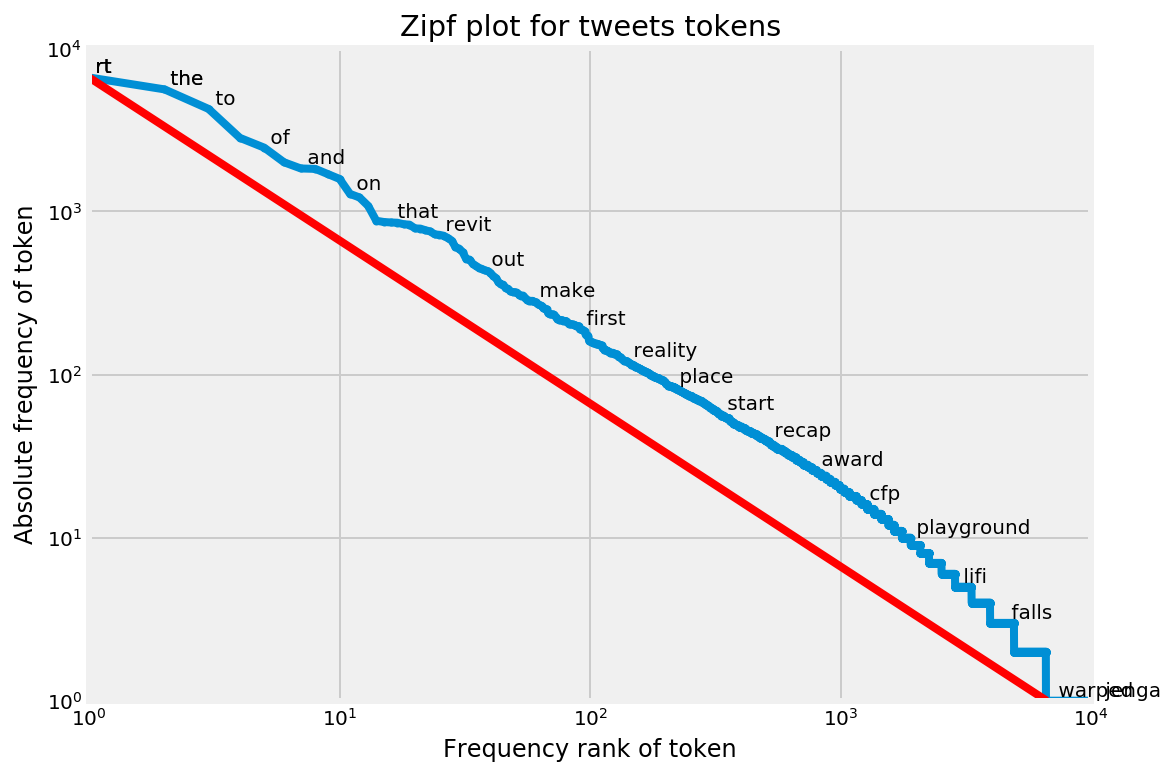

In [218]:
# Plot Zipf's law table

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import *
counts = term_freq_df.terms
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**4)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [231]:
# Calculate term frequencies without stop words

# First, add some Twitter specific words to the list of stopwords
from sklearn.feature_extraction import text
twitter_stop_words = ['rt']
stopwords = text.ENGLISH_STOP_WORDS.union(twitter_stop_words)

cvec = CountVectorizer(stop_words=stopwords,max_features=10000)
cvec.fit(english_df.text2)
document_matrix = cvec.transform(english_df.text2)

In [232]:
term_batches = np.linspace(0,11266,10).astype(int) # from 0 to 798179
i=0
eng_tf_stopped = []
while i < len(term_batches)-1:
    batch_result = np.sum(document_matrix[term_batches[i]:term_batches[i+1]].toarray(),axis=0)
    eng_tf_stopped.append(batch_result)
    print(term_batches[i+1],"entries' term freuquency calculated")
    i += 1

1251 entries' term freuquency calculated
2503 entries' term freuquency calculated
3755 entries' term freuquency calculated
5007 entries' term freuquency calculated
6258 entries' term freuquency calculated
7510 entries' term freuquency calculated
8762 entries' term freuquency calculated
10014 entries' term freuquency calculated
11266 entries' term freuquency calculated


In [234]:
terms_stopped = np.sum(eng_tf_stopped,axis=0)
term_freq_df_stopped = pd.DataFrame([terms_stopped],columns=cvec.get_feature_names()).transpose() # term_freq_df2 is without stopwords
term_freq_df_stopped.columns = ['terms']
term_freq_df_stopped.sort_values(by='terms', ascending=False).iloc[:100]

,terms
bim,1582
construction,830
revit,719
new,663
design,562
autocad,451
building,391
help,336
world,320
architecture,309


## TF-IDF and Doc2Vec models

In [192]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
#X = [['i', 'have', 'never', 'been', 'there'], ['i', 'like', 'cats'],['he', 'calls', 'her', 'on', 'the', 'phone'],['they', 'are', 'listed', 'as', 'the', 'next', 'ones']]
X = [word_tokenize(item) for item in english_df['text2'].tolist()]
#print(len(X))
model = gensim.models.Word2Vec(min_count=1)
model.build_vocab(X)
model.train(X, total_examples=11266, epochs=20)
#print(model.wv['next'])
print(model)

Word2Vec(vocab=10754, size=100, alpha=0.025)


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'